In [2]:
polygon_coords = [
        (0.1425, 52.2485), (0.1470, 52.2470), (0.1435, 52.2435),
        (0.1510, 52.2410), (0.1500, 52.2380), (0.1370, 52.2430)]

In [34]:
from matplotlib import rc
plt.style.use("default")
rc('font',**{'family':'Source Sans 3','weight':'normal','size':'8'})

Origin: (0.1425, 52.2485)
Offsets: [(0.0, 0.0), (0.004500000000000004, -0.0015000000000000568), (0.0010000000000000009, -0.005000000000002558), (0.008500000000000008, -0.007500000000000284), (0.007500000000000007, -0.010500000000000398), (-0.005499999999999977, -0.00549999999999784)]
Offsets in meters: [(-0.0, -0.0), (500.37716990051473, -166.7918741084809), (111.19492664455885, -555.9729136951986), (945.1568764787503, -833.9593705424008), (833.9619498341913, -1167.5431187593563), (-611.5720965450705, -611.5702050641652)]
Rotated Offsets: [(0.0, -0.0), (500.37716990051473, -166.7918741084809), (111.19492664455885, -555.9729136951986), (945.1568764787503, -833.9593705424008), (833.9619498341913, -1167.5431187593563), (-611.5720965450705, -611.5702050641652)]
Intersections: [[  833.96194983 -1167.54311876]
 [  833.96194983 -1167.54311876]
 [  877.20442131 -1037.81610556]
 [  496.67067235 -1037.81610556]
 [  920.44689278  -908.08909237]
 [  159.37939486  -908.08909237]
 [  778.36448651  -

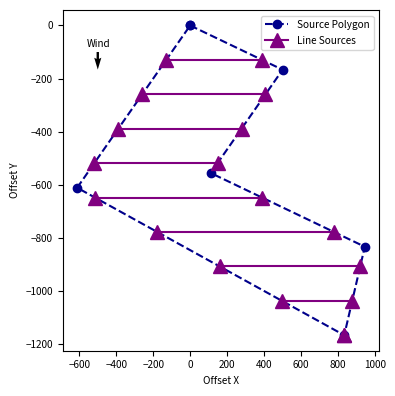

In [43]:
import math
import numpy as np
import matplotlib.pyplot as plt
angle=0
def get_origin_and_offset(coords):
    origin = coords[0]
    offsets = [(x - origin[0], y - origin[1]) for x, y in coords]
    return origin, offsets

origin, offsets = get_origin_and_offset(polygon_coords)
print("Origin:", origin)
print("Offsets:", offsets)

def lat_to_meters(lat, origin):
    # Approximate conversion assuming a spherical Earth
    R = 6371000  # radius of Earth in meters
    lat1, lon1 = origin
    lat2, lon2 = lat1 + lat, lon1
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    a = math.sin(delta_phi / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    sign = 1 if lat > 0 else -1
    return distance * sign

def lon_to_meters(lon, origin):
    R = 6371000  # radius of Earth in meters
    lat1, lon1 = origin
    lat2, lon2 = lat1, lon1 + lon
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    a = math.sin(delta_phi / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    sign = 1 if lon > 0 else -1
    return distance * sign

# Convert offsets to meters
offsets_in_meters = [(lat_to_meters(lat, origin), lon_to_meters(lon, origin)) for lat, lon in offsets]
print("Offsets in meters:", offsets_in_meters)

def rotate_offsets(offsets, degrees):
    radians = math.radians(degrees)
    cos_angle = math.cos(radians)
    sin_angle = math.sin(radians)
    rotated = [(x * cos_angle - y * sin_angle, x * sin_angle + y * cos_angle) for x, y in offsets]
    return rotated

rotated_offsets = rotate_offsets(offsets_in_meters, angle)
print("Rotated Offsets:", rotated_offsets)

def calculate_intersections(steps,offsets):
    max_y = max(offset[1] for offset in offsets)
    min_y = min(offset[1] for offset in offsets)
    y_coords = np.linspace(min_y, max_y, steps)
    intersections = []
    for y in y_coords:
        intersections_at_y = []
        for i in range(len(offsets)):
            p1 = offsets[i]
            p2 = offsets[(i + 1) % len(offsets)]
            if (p1[1] <= y < p2[1]) or (p2[1] <= y < p1[1]):
                x_intersect = p1[0] + (y - p1[1]) * (p2[0] - p1[0]) / (p2[1] - p1[1])
                intersections_at_y.append(x_intersect)
        
        for x in intersections_at_y:
            intersections.append((x,y))
    return intersections

steps = 10
intersections = calculate_intersections(steps, rotated_offsets)
intersections = np.array(intersections)

print("Intersections:", intersections)

# Extract x and y coordinates from offsets
x_coords, y_coords = zip(*offsets_in_meters)
# Convert x_coords and y_coords to meters

# Close the polygon by appending the first point at the end
x_coords_meters = list(x_coords) + [x_coords[0]]
y_coords_meters = list(y_coords) + [y_coords[0]]
# Rotate the polygon by the given angle
rotated_polygon = rotate_offsets(offsets_in_meters, angle)

# Extract x and y coordinates from rotated polygon
x_rotated, y_rotated = zip(*rotated_polygon)

# Close the rotated polygon by appending the first point at the end
x_rotated_meters = list(x_rotated) + [x_rotated[0]]
y_rotated_meters = list(y_rotated) + [y_rotated[0]]

fig = plt.figure(figsize=(4,4))
# Plot the rotated polygon in meters
plt.plot(x_rotated_meters, y_rotated_meters, marker='o', linestyle='--', color='darkblue', label='Source Polygon')
# Plot the polygon in meters
plt.xlabel('Offset X')
plt.ylabel('Offset Y')

def calculate_horizontal_segments(intersections):
    segments = []
    y_values = np.unique(intersections[:, 1])
    for y in y_values:
        x_values = intersections[intersections[:, 1] == y][:, 0]
        if len(x_values) > 1:
            x_values.sort()
            for i in range(0, len(x_values) - 1, 2):
                length = x_values[i + 1] - x_values[i]
                midpoint = (x_values[i + 1] + x_values[i]) / 2
                segments.append((y, length, midpoint))
    return segments

horizontal_segments = calculate_horizontal_segments(intersections)
print("Horizontal Segments:", horizontal_segments)
horizontal_segments = np.array(horizontal_segments)

label = 'Line Sources'
for segment in horizontal_segments:
    y, length, midpoint = segment
    plt.plot([midpoint - length / 2, midpoint + length / 2], [y, y], color='purple',marker='^',markersize=10,label=label)
    label = "_nolegend_"

plt.legend()
plt.quiver(-500,-100,0,-1)
plt.text(-560,-80,'Wind')
plt.tight_layout()
plt.savefig('area_source.png',dpi=300)
plt.show()



[[-945.15687648    0.         -833.95937054]
 [-863.22377264  273.10950146 -943.20317113]
 [-781.29066879  367.94752615 -963.31123332]
 [-699.35756495  363.74584151 -933.89944086]
 [-617.42446111  359.54415687 -904.48764839]
 [-535.49135726  355.34247223 -875.07585593]
 [-453.55825342  870.04884038 -586.21003707]
 [-371.62514958  865.84715574 -556.79824461]
 [-289.69204573  861.6454711  -527.38645214]
 [-207.75894189  857.44378646 -497.97465968]
 [-125.82583805  853.24210183 -468.56286721]
 [ -43.8927342   849.04041719 -439.15107474]
 [  38.04036964  794.11839656 -435.09945027]
 [ 119.97347348  680.67291134 -460.3095581 ]
 [ 201.90657733  567.22742612 -485.51966593]
 [ 283.83968117  453.78194089 -510.72977375]
 [ 365.77278501  340.33645567 -535.93988158]
 [ 447.70588886  226.89097045 -561.14998941]
 [ 529.6389927   113.44548522 -586.36009724]]
Segments for every 10 degrees have been calculated and saved.


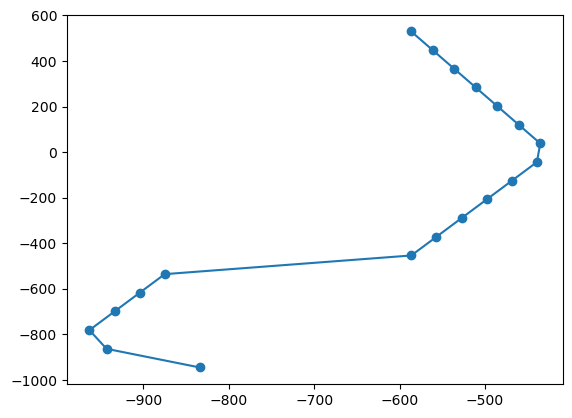

In [4]:
import pickle
import csv

steps=20
segments_by_angle = {}

for angle in range(0, 360, 10):
    rotated_offsets = rotate_offsets(offsets_in_meters, angle)
    intersections = calculate_intersections(steps, rotated_offsets)
    intersections = np.array(intersections)
    horizontal_segments = calculate_horizontal_segments(intersections)
    segments_by_angle[angle] = np.array(horizontal_segments)
# Merge horizontal segments that have the same y value
    merged_segments = []
    horizontal_segments = np.array(horizontal_segments)
    for y in np.unique(horizontal_segments[:, 0]):
        segments_at_y = horizontal_segments[horizontal_segments[:, 0] == y]
        if len(segments_at_y) > 1:
            min_x = np.min(segments_at_y[:, 2] - segments_at_y[:, 1] / 2)
            max_x = np.max(segments_at_y[:, 2] + segments_at_y[:, 1] / 2)
            length = max_x - min_x
            midpoint = (min_x + max_x) / 2
            merged_segments.append([y, length, midpoint])
        else:
            merged_segments.append(segments_at_y[0])

    merged_segments = np.array(merged_segments)
    segments_by_angle[angle] = merged_segments
print(segments_by_angle[270])
plt.plot(segments_by_angle[270][:,2], segments_by_angle[270][:,0], marker='o')
# Save the segments_by_angle dictionary to a file
# Save the segments_by_angle dictionary to a CSV file
with open('segments_by_angle.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['wd', 'Y', 'Length', 'Midpoint'])
    for angle, segments in segments_by_angle.items():
        for segment in segments:
            csvwriter.writerow([angle] + segment.tolist())

print("Segments for every 10 degrees have been calculated and saved.")

In [5]:
for n in range(0, 360, 1):
    print(np.round(n,-1))

0
0
0
0
0
0
10
10
10
10
10
10
10
10
10
20
20
20
20
20
20
20
20
20
20
20
30
30
30
30
30
30
30
30
30
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
60
60
60
60
60
60
60
60
60
60
60
70
70
70
70
70
70
70
70
70
80
80
80
80
80
80
80
80
80
80
80
90
90
90
90
90
90
90
90
90
100
100
100
100
100
100
100
100
100
100
100
110
110
110
110
110
110
110
110
110
120
120
120
120
120
120
120
120
120
120
120
130
130
130
130
130
130
130
130
130
140
140
140
140
140
140
140
140
140
140
140
150
150
150
150
150
150
150
150
150
160
160
160
160
160
160
160
160
160
160
160
170
170
170
170
170
170
170
170
170
180
180
180
180
180
180
180
180
180
180
180
190
190
190
190
190
190
190
190
190
200
200
200
200
200
200
200
200
200
200
200
210
210
210
210
210
210
210
210
210
220
220
220
220
220
220
220
220
220
220
220
230
230
230
230
230
230
230
230
230
240
240
240
240
240
240
240
240
240
240
240
250
250
250
250
250
250
250
250
250
260
260
260
260
260
260
260
260
260
260
260
270
270
270
270
270
270
270
270
270
2